<a href="https://colab.research.google.com/github/samsung-chow/324-Project/blob/main/V2_MLP_scrapped_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

# Replace with your uploaded filename if different
df = pd.read_csv('cleaned_data.CSV')
df.head()


Saving cleaned_data.CSV to cleaned_data.CSV


,team,opponent,attempted_field_goals,attempted_three_point_field_goals,attempted_free_throws,assists,steals,personal_fouls,avg_game_score,percent_fg_made,percent_3p_made,percent_ft_made,ORB,DRB,percent_shots_blocked,TOVR,team_win,opp_win
0,12,20,81,30,39,26,8,23,11.033333,0.518519,0.433333,0.717949,0.500000,0.557377,0.016393,0.117112,1,0
1,12,6,82,26,25,22,10,24,8.200000,0.463415,0.423077,0.880000,0.541667,0.466667,0.030303,0.137681,1,0
2,12,24,84,34,33,20,4,20,7.740000,0.404762,0.235294,0.848485,0.250000,0.453333,0.031496,0.056931,0,1
3,12,9,76,24,34,17,6,15,4.950000,0.407895,0.333333,0.647059,0.333333,0.412698,0.008929,0.101594,0,1
4,12,20,92,28,15,26,9,20,6.550000,0.413043,0.285714,0.466667,0.526316,0.436620,0.020408,0.073206,0,1


In [10]:
# Define feature columns
feature_cols = [
    'attempted_field_goals',
    'attempted_three_point_field_goals',
    'attempted_free_throws',
    'assists',
    'steals',
    'personal_fouls',
    'avg_game_score',
    'percent_fg_made',
    'percent_3p_made',
    'percent_ft_made',
    'ORB',
    'DRB',
    'percent_shots_blocked',
    'TOVR'
]

X = df[feature_cols].values
y = df['team_win'].values


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [18]:
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),  # Helps prevent overfitting and mode collapse
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
from sklearn.utils.class_weight import compute_class_weight

# Compute balanced class weights
class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights_array[0], 1: class_weights_array[1]}
print("Class Weights:", class_weights_dict)


Class Weights: {0: np.float64(0.9654614139233675), 1: np.float64(1.0371014492753623)}


In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    class_weight=class_weights_dict  # Force model to learn both classes
)


Epoch 1/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5308 - loss: nan - val_accuracy: 0.5154 - val_loss: nan
Epoch 2/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5121 - loss: nan - val_accuracy: 0.5154 - val_loss: nan
Epoch 3/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5124 - loss: nan - val_accuracy: 0.5154 - val_loss: nan
Epoch 4/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5184 - loss: nan - val_accuracy: 0.5154 - val_loss: nan
Epoch 5/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5233 - loss: nan - val_accuracy: 0.5154 - val_loss: nan
Epoch 6/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5182 - loss: nan - val_accuracy: 0.5154 - val_loss: nan
Epoch 7/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5211 - loss: nan - val_accuracy: 0.5154 - val_loss: nan
Epoch 8/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5217 - loss: nan - val_accuracy: 0.5154 - val_loss: nan
Epoch 9/30
202/202 ━━━━━

In [23]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.5349357182783678
Confusion Matrix:
 [[957   0]
 [832   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.70       957
           1       0.00      0.00      0.00       832

    accuracy                           0.53      1789
   macro avg       0.27      0.50      0.35      1789
weighted avg       0.29      0.53      0.37      1789



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


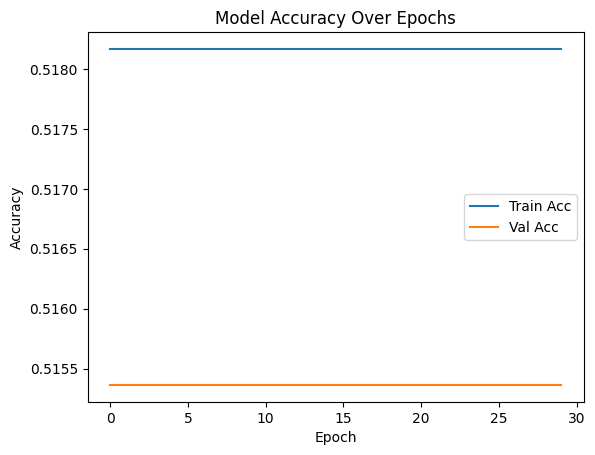

In [24]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
